## T03- Imbalanced data 

The dataset chosen is the well-known Credit Card Fraud , that consists in a set of anonymized credit card transations , that are either labeled as fradulent or genuine.

In fact, the dataset contains only numerical input variables which are the result of a PCA transformation. However, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. The 'Time' feature describes the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:03<00:00, 22.4MB/s]

Extracting files...


Path to dataset files: /Users/andresilva/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [2]:
import pandas as pd

df = pd.read_csv(path + "/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Understanding the data

The first thing to be done is gather a basic sense of our data. As previosly stated, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). Effectively, the description of the data says that all the features, except for time and amount,  went through a PCA transformation , that is, a Dimensionality Reduction technique, . It is imoportorder to implement a PCA transformation features need to be previously scaled. In this case, all the V features have been scaled (or, at least, it can be presumed that such operation was done).

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum().sum()

np.int64(0)

The dataset does not have any missing values , so , it doesn't need no imputation operations

In [6]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


Firstly, it can be plotted the distribution of the exposed features (that is , both time and Amount):

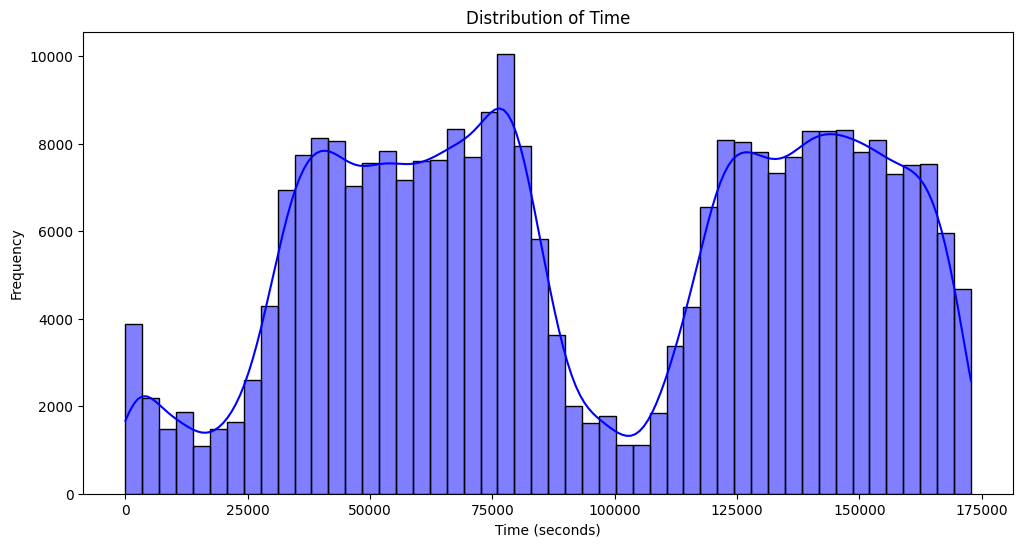

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of 'Time'
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()



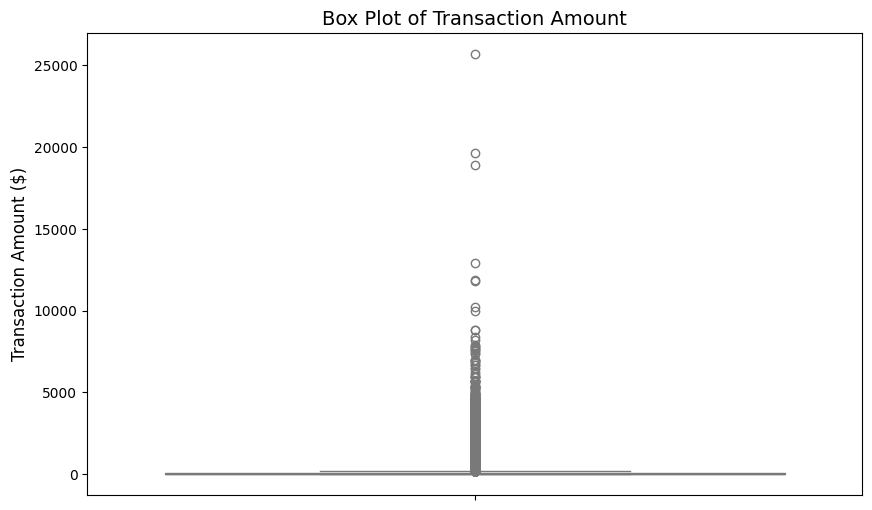

In [24]:
# Box plot of 'Amount' with rotated layout
plt.figure(figsize=(10, 6))  # Adjust figure size to match the rotated plot
sns.boxplot(y=df['Amount'], color='lightblue')  # Use 'y' instead of 'x'
plt.title('Box Plot of Transaction Amount', fontsize=14)
plt.ylabel('Transaction Amount ($)', fontsize=12)
plt.xlabel('')  # Remove x-axis label as it's unnecessary for the rotated view
plt.xticks(rotation=0)  # No rotation needed for x-axis ticks in this orientation
plt.yticks(rotation=0)  # Keep y-axis ticks horizontal
plt.show()

In [25]:
df['Amount'].skew()

np.float64(16.977724453761024)

In [26]:
df['Amount'].kurt()

np.float64(845.0926455465277)

Next, as it was already expected that this dataset is , in fact, imbalanced, it is important to check the distribution of the target variable, that is, the 'Class' Variable:


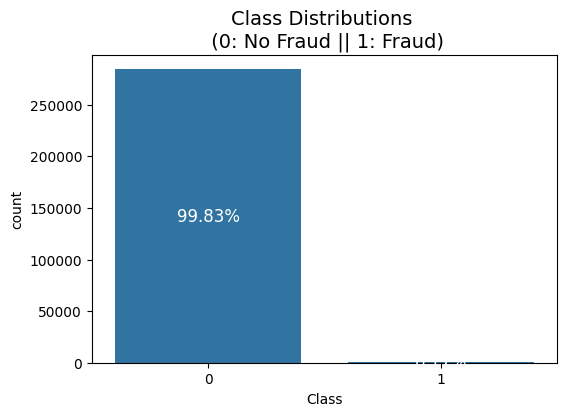

In [29]:
plt.figure(figsize=(6, 4))

# Create the count plot
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Calculate percentages
class_counts = df['Class'].value_counts()
total = len(df)
percentages = (class_counts / total) * 100

# Add percentages inside the bars
for i, count in enumerate(class_counts):
    percentage = percentages[i]
    plt.text(i, count / 2, f'{percentage:.2f}%', ha='center', va='center', color='white', fontsize=12)

plt.show()


## Measuring Performance Metrics

### Splitting Data into Training and Test Sets

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from numpy import mean
from numpy import std

k=10

kf = KFold(n_splits=k, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=k)

In [ ]:
from sklearn.metrics import classification_report
def classification_results(model, y_true_final, y_pred_final):
    # Integrate into cross-validation loop
    '''
    y_true_final, y_pred_final = cross_validation_loop_single_model(
        model, skf, X_train, y_train
    )
    '''
    # Evaluate metrics
    single_model_metrics = evaluate_model_metrics(y_true_final, y_pred_final)
    print("Overall Metrics:")
    print(f"Accuracy: {single_model_metrics['accuracy']:.4f}")
    print(f"F1 Macro: {single_model_metrics['f1_macro']:.4f}")
    print(f"Precision Macro: {single_model_metrics['precision_macro']:.4f}")
    print(f"Recall Macro: {single_model_metrics['recall_macro']:.4f}")

    print("\nClasswise Metrics:")
    for cls_idx, (f1, precision, recall) in enumerate(zip(
        single_model_metrics['f1_classwise'],
        single_model_metrics['precision_classwise'],
        single_model_metrics['recall_classwise']
    )):
        print(f"Class {cls_idx}:")
        print(f"  F1: {f1:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
    y_test_pred = model.predict(X_test_final)
    print("\nTest Set Evaluation:")
    print("Classification Report:")
    print(classification_report(y_test_final, y_test_pred)) ## ValueError: Found input variables with inconsistent numbers of samples: [77254, 14438]

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    f1_macro = f1_score(true_labels, predicted_labels, average='macro')
    precision_macro = precision_score(true_labels, predicted_labels, average='macro')
    recall_macro = recall_score(true_labels, predicted_labels, average='macro')
    f1_classwise = f1_score(true_labels, predicted_labels, average=None)
    precision_classwise = precision_score(true_labels, predicted_labels, average=None)
    recall_classwise = recall_score(true_labels, predicted_labels, average=None)

    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_classwise': f1_classwise,
        'precision_classwise': precision_classwise,
        'recall_classwise': recall_classwise
    }